In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']



np.linspace(5, 50, 10)

array([ 5., 10., 15., 20., 25., 30., 35., 40., 45., 50.])

array([1.00000000e-05, 2.15443469e-05, 4.64158883e-05, 1.00000000e-04,
       2.15443469e-04, 4.64158883e-04, 1.00000000e-03, 2.15443469e-03,
       4.64158883e-03, 1.00000000e-02])

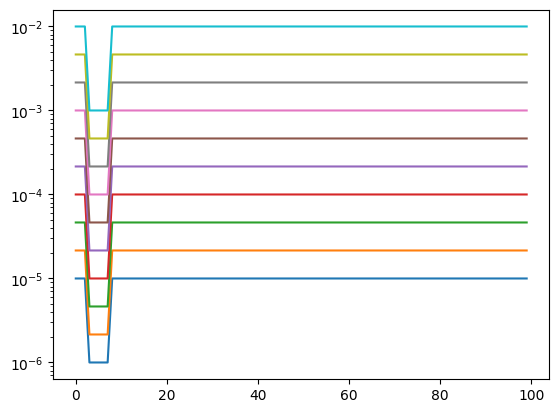

In [15]:
network  = torch.nn.Linear(10, 10)
# optim = torch.optim.SGD(network.parameters())

# scheduler = torch.optim.lr_scheduler.ConstantLR(optim, factor=1)
n_epochs = 100
lr = np.logspace(-5, -2, 10)
learning_rate = np.empty((len(lr), n_epochs))
for lr_idx, lr in enumerate(lr):
    optim = torch.optim.AdamW(network.parameters(), lr=lr)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optim, T_max=200, eta_min=1e-6)
    # scheduler = torch.optim.lr_scheduler.OneCycleLR(optim, max_lr=lr, total_steps=200)
    scheduler = torch.optim.lr_scheduler.StepLR(optim, step_size=5, gamma=0.5)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optim, T_0=10, )
    scheduler = torch.optim.lr_scheduler.CyclicLR(optim, base_lr=lr, max_lr=1e-2)
    scheduler = torch.optim.lr_scheduler.StepLR(optim, step_size=5, gamma=0.9)
    scheduler = torch.optim.lr_scheduler.ConstantLR(optim, factor=0.1)
    for epoch in range(n_epochs):
        scheduler.step()
        learning_rate[lr_idx, epoch] = get_lr(optim)


plt.plot(learning_rate.T)
plt.yscale("log")
learning_rate[:, -1]

In [4]:
# Assuming optimizer has two groups.
lambda1 = lambda epoch: epoch // 30
lambda2 = lambda epoch: 0.95 ** epoch
scheduler = torch.optim.lr_scheduler.LambdaLR(optim, lr_lambda=[lambda1, lambda2])
for epoch in range(100):

    print(scheduler.step())

ValueError: Expected 1 lr_lambdas, but got 2

[0.001, 0.0028, 0.0046, 0.0063999999999999994, 0.008199999999999999, 0.01, 0.009997533048548475, 0.009990134628777144, 0.0099778120420331, 0.009960577449221734, 0.009938447858805393, 0.009911445110018081, 0.00987959585131277, 0.009842931514062592, 0.009801488281541879, 0.009755307053217623, 0.009704433404386653, 0.009648917541198315, 0.009588814251107065, 0.009524182848803867, 0.009455087117679747, 0.009381595246879298, 0.00930377976400622, 0.009221717463547328, 0.009135489331085675, 0.009045180463377553, 0.008950879984372268, 0.008852680957257561, 0.008750680292617486, 0.00864497865279335, 0.008535680352542147, 0.008422893256090483, 0.008306728670685602, 0.008187301236748578, 0.00806472881473806, 0.007939132368836224, 0.007810635847571731, 0.007679366061497497, 0.007545452558043985, 0.007409027493671529, 0.0072702255034478675, 0.007129183568179584, 0.006986040879228589, 0.006840938701147052, 0.006694020232266339, 0.006545430463377554, 0.006395316034643131, 0.006243825090880694, 0.0060

c:\Users\nikla\miniconda3\envs\DLRK\Lib\site-packages\torch\optim\lr_scheduler.py:143: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
c:\Users\nikla\miniconda3\envs\DLRK\Lib\site-packages\torch\optim\lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate 

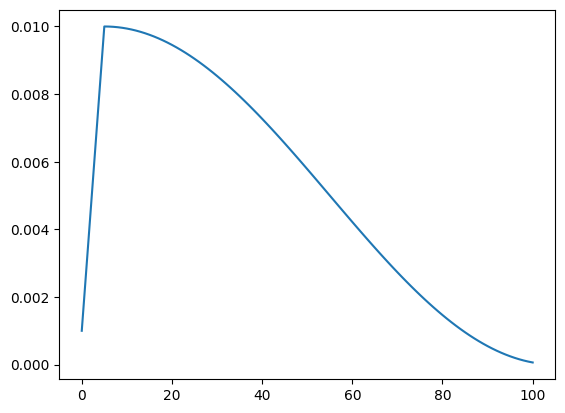

In [20]:
# Assuming optimizer uses lr = 1. for all groups
# lr = 0.1     if epoch == 0
# lr = 0.1     if epoch == 1
# lr = 0.9     if epoch == 2
# lr = 0.81    if epoch == 3
# lr = 0.729   if epoch == 4
scheduler1 = torch.optim.lr_scheduler.LinearLR(optim, start_factor=0.1, total_iters=5)
scheduler2 = torch.optim.lr_scheduler.ConstantLR(optim, factor=1)
scheduler2 = torch.optim.lr_scheduler.CosineAnnealingLR(optim, T_max = 100, eta_min = 1e-6)
scheduler =  torch.optim.lr_scheduler.SequentialLR(optim, schedulers=[scheduler1, scheduler2], milestones=[5])
lr = [get_lr(optim)]
for epoch in range(100):
    scheduler.step()
    lr.append(get_lr(optim))
print(lr)
plt.plot(lr)